## Import Libraries

In [30]:
#pip install autoviz

In [31]:
#from autoviz.AutoViz_Class import AutoViz_Class

In [32]:
## Import Libraries
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline


## Mount Google Drive

In [33]:
## Mount google drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [34]:
## Change working directory
os.chdir('/content/drive/MyDrive/StandardFocus')

## Import Data

In [35]:
## Read in csv
overwatch_data = pd.read_csv('overwatch-diary.csv')

In [36]:
overwatch_data.head()

,date,time,season,game_id,sr_start,sr_finish,sr_delta,streak_number,result,my_team_sr,...,healing,deaths,weapon_accuracy,offensive_assists,defensive_assists,scoped,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49
0,12/4/2016,NaN,3,1.0,2387,NaN,NaN,NaN,Win,-,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,12/4/2016,NaN,3,2.0,2387,2367,-20,NaN,Loss,2617,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,12/4/2016,NaN,3,2.0,NaN,NaN,NaN,NaN,Loss,2617,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,12/4/2016,NaN,3,3.0,2367,2367,0,NaN,-,2680,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,12/15/2016,NaN,3,4.0,2367,2367,0,NaN,-,-,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
## Dataset Columns
overwatch_data.columns

Index(['date', 'time', 'season', 'game_id', 'sr_start', 'sr_finish',
       'sr_delta', 'streak_number', 'result', 'my_team_sr', 'enemy_team_sr',
       'team_sr_delta', 'my_team_1', 'my_team_2', 'my_team_3', 'my_team_4',
       'my_team_5', 'my_team_6', 'enemy_team_1', 'enemy_team_2',
       'enemy_team_3', 'enemy_team_4', 'enemy_team_5', 'enemy_team_6', 'map',
       'round', 'capscore', 'score_distance', 'time_left', 'team_role',
       'match_length', 'charcter_1', 'character_2', 'character_3',
       'communication', 'note', 'psychological_condition', 'eliminations',
       'objective_kills', 'damage', 'healing', 'deaths', 'weapon_accuracy',
       'offensive_assists', 'defensive_assists', 'scoped', 'Unnamed: 46',
       'Unnamed: 47', 'Unnamed: 48', 'Unnamed: 49'],
      dtype='object')

In [38]:
## Select columns of interest
columns_of_interest = ['date','sr_start','sr_finish','sr_delta','my_team_sr','enemy_team_sr','team_sr_delta','result']
overwatch_select = overwatch_data[columns_of_interest]
overwatch_select.head()

,date,sr_start,sr_finish,sr_delta,my_team_sr,enemy_team_sr,team_sr_delta,result
0,12/4/2016,2387,NaN,NaN,-,-,-,Win
1,12/4/2016,2387,2367,-20,2617,2619,-2,Loss
2,12/4/2016,NaN,NaN,NaN,2617,2619,-2,Loss
3,12/4/2016,2367,2367,0,2680,2745,-65,-
4,12/15/2016,2367,2367,0,-,-,-,-


In [39]:
## Filter for non - missing delta
overwatch_complete = overwatch_select.loc[overwatch_select['result'].notnull()]
overwatch_complete

,date,sr_start,sr_finish,sr_delta,my_team_sr,enemy_team_sr,team_sr_delta,result
0,12/4/2016,2387,NaN,NaN,-,-,-,Win
1,12/4/2016,2387,2367,-20,2617,2619,-2,Loss
2,12/4/2016,NaN,NaN,NaN,2617,2619,-2,Loss
3,12/4/2016,2367,2367,0,2680,2745,-65,-
4,12/15/2016,2367,2367,0,-,-,-,-
...,...,...,...,...,...,...,...,...
3294,12/22/2017,2487,2512,25,2463,2491,28,W
3295,12/22/2017,NaN,NaN,NaN,2463,2491,28,W
3296,12/22/2017,2512,2491,-21,2537,2534,-3,L
3297,12/22/2017,NaN,NaN,NaN,2537,2534,-3,L


In [40]:
## Glimpse target feature
overwatch_complete['result'].value_counts()

L       1050
W       1032
Loss     467
Win      453
Draw     261
-         33
l          2
DC         1
Name: result, dtype: int64

In [41]:
## Clean target feature
overwatch_complete['result'] = overwatch_complete['result'].replace('L' ,'Loss')
overwatch_complete['result'] = overwatch_complete['result'].replace('W' ,'Win')

In [42]:
overwatch_complete['result'].value_counts()

Loss    1517
Win     1485
Draw     261
-         33
l          2
DC         1
Name: result, dtype: int64

In [43]:
## Filter for valid target values
select_results = ['Loss','Win','Draw']
overwatch_complete = overwatch_complete.loc[overwatch_complete['result'].isin(select_results)]
overwatch_complete

,date,sr_start,sr_finish,sr_delta,my_team_sr,enemy_team_sr,team_sr_delta,result
0,12/4/2016,2387,NaN,NaN,-,-,-,Win
1,12/4/2016,2387,2367,-20,2617,2619,-2,Loss
2,12/4/2016,NaN,NaN,NaN,2617,2619,-2,Loss
5,12/15/2016,2367,2330,-37,2659,2687,-28,Loss
6,12/15/2016,NaN,NaN,NaN,2659,2687,-28,Loss
...,...,...,...,...,...,...,...,...
3294,12/22/2017,2487,2512,25,2463,2491,28,Win
3295,12/22/2017,NaN,NaN,NaN,2463,2491,28,Win
3296,12/22/2017,2512,2491,-21,2537,2534,-3,Loss
3297,12/22/2017,NaN,NaN,NaN,2537,2534,-3,Loss


In [44]:
## Drop missing data
overwatch_complete = overwatch_complete.dropna()
overwatch_complete

,date,sr_start,sr_finish,sr_delta,my_team_sr,enemy_team_sr,team_sr_delta,result
1,12/4/2016,2387,2367,-20,2617,2619,-2,Loss
5,12/15/2016,2367,2330,-37,2659,2687,-28,Loss
10,12/15/2016,2330,2350,20,2573,2622,-49,Win
11,12/6/2016,2350,2331,-19,-,-,-,Loss
13,12/6/2016,2331,2331,0,-,-,-,Draw
...,...,...,...,...,...,...,...,...
3290,12/22/2017,2490,2462,-28,2486,2491,5,Loss
3292,12/22/2017,2462,2487,25,2479,2468,-11,Win
3294,12/22/2017,2487,2512,25,2463,2491,28,Win
3296,12/22/2017,2512,2491,-21,2537,2534,-3,Loss


In [45]:
## Drop '-' values
overwatch_complete = overwatch_complete[~overwatch_complete.isin(['-']).any(axis=1)]
overwatch_complete

,date,sr_start,sr_finish,sr_delta,my_team_sr,enemy_team_sr,team_sr_delta,result
1,12/4/2016,2387,2367,-20,2617,2619,-2,Loss
5,12/15/2016,2367,2330,-37,2659,2687,-28,Loss
10,12/15/2016,2330,2350,20,2573,2622,-49,Win
35,12/7/2016,2595,2573,-22,2707,2784,-77,Loss
37,12/7/2016,2573,2609,36,2693,2711,-18,Win
...,...,...,...,...,...,...,...,...
3290,12/22/2017,2490,2462,-28,2486,2491,5,Loss
3292,12/22/2017,2462,2487,25,2479,2468,-11,Win
3294,12/22/2017,2487,2512,25,2463,2491,28,Win
3296,12/22/2017,2512,2491,-21,2537,2534,-3,Loss


In [46]:
## Check data types
numeric_cols = overwatch_complete.columns.drop(['date','result'])
overwatch_complete[numeric_cols] = overwatch_complete[numeric_cols].apply(pd.to_numeric, errors='coerce')
overwatch_complete.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1471 entries, 1 to 3298
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1471 non-null   object 
 1   sr_start       1471 non-null   int64  
 2   sr_finish      1471 non-null   int64  
 3   sr_delta       1470 non-null   float64
 4   my_team_sr     1469 non-null   float64
 5   enemy_team_sr  1467 non-null   float64
 6   team_sr_delta  1467 non-null   float64
 7   result         1471 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 103.4+ KB


In [47]:
## Write to disc
overwatch_complete.to_csv('overwatch_clean.csv',index=False)

## EDA
### Automated EDA

Shape of your Data Set loaded: (1471, 8)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    8 Predictors classified...
        No variables removed since no ID or low-information variables found in data set
Number of All Scatter Plots = 10


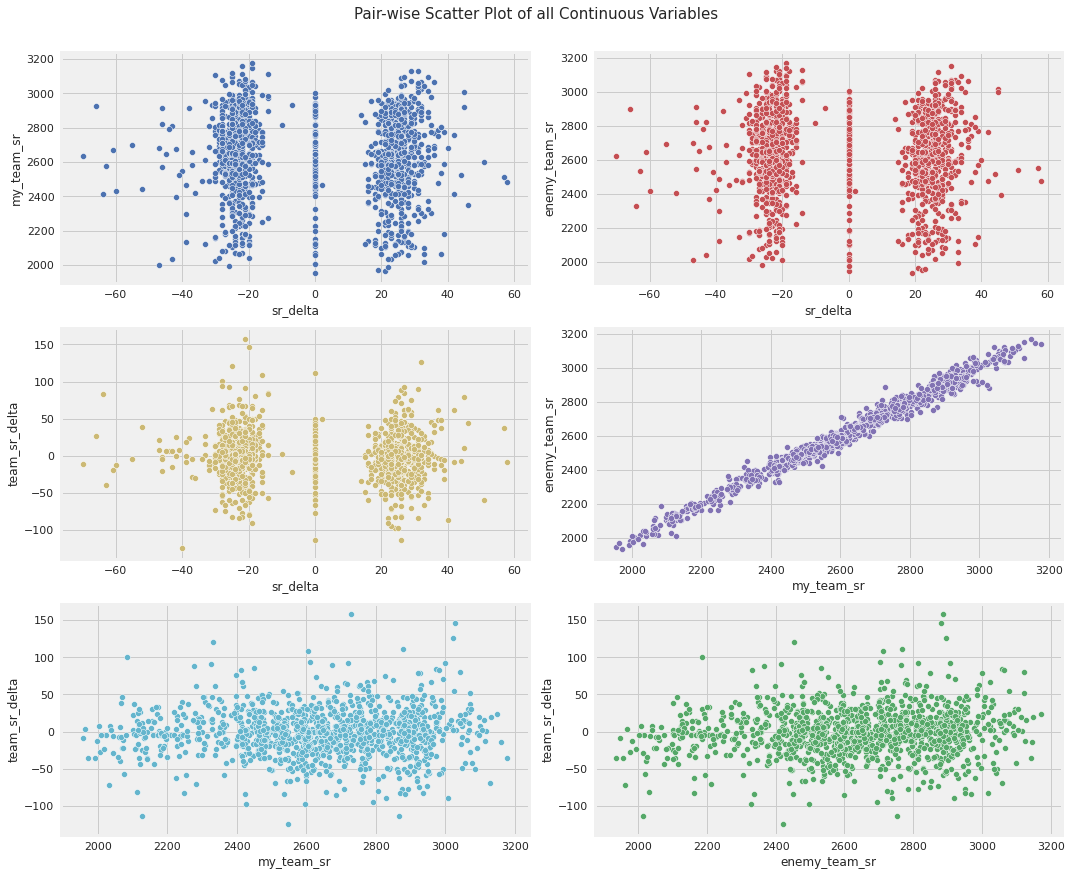

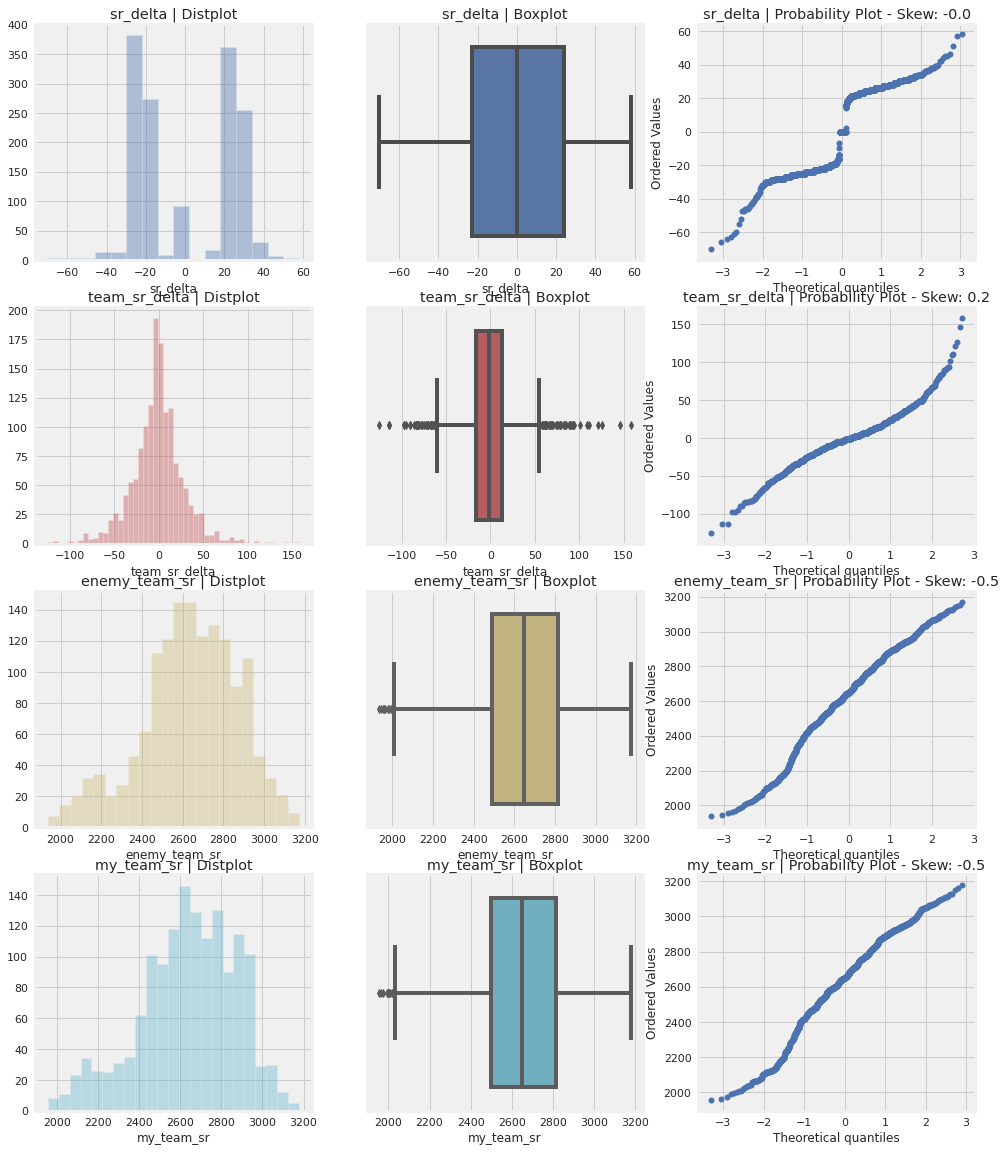

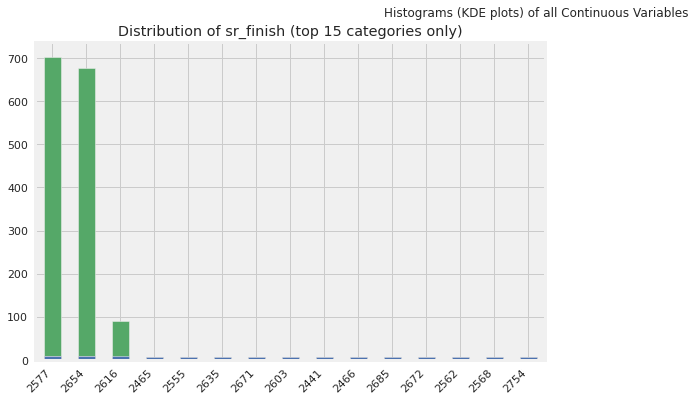

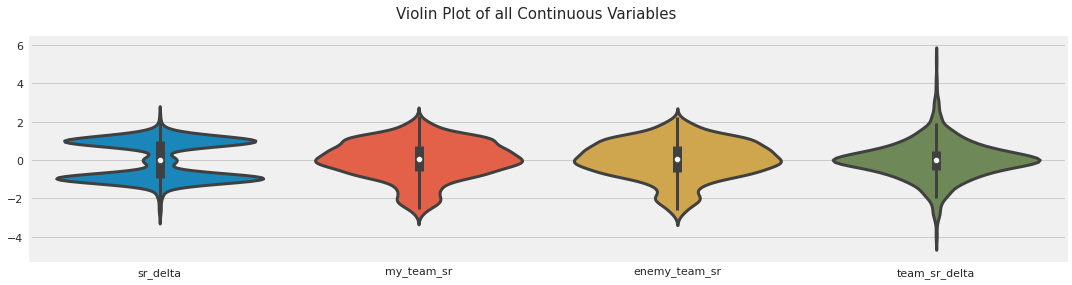

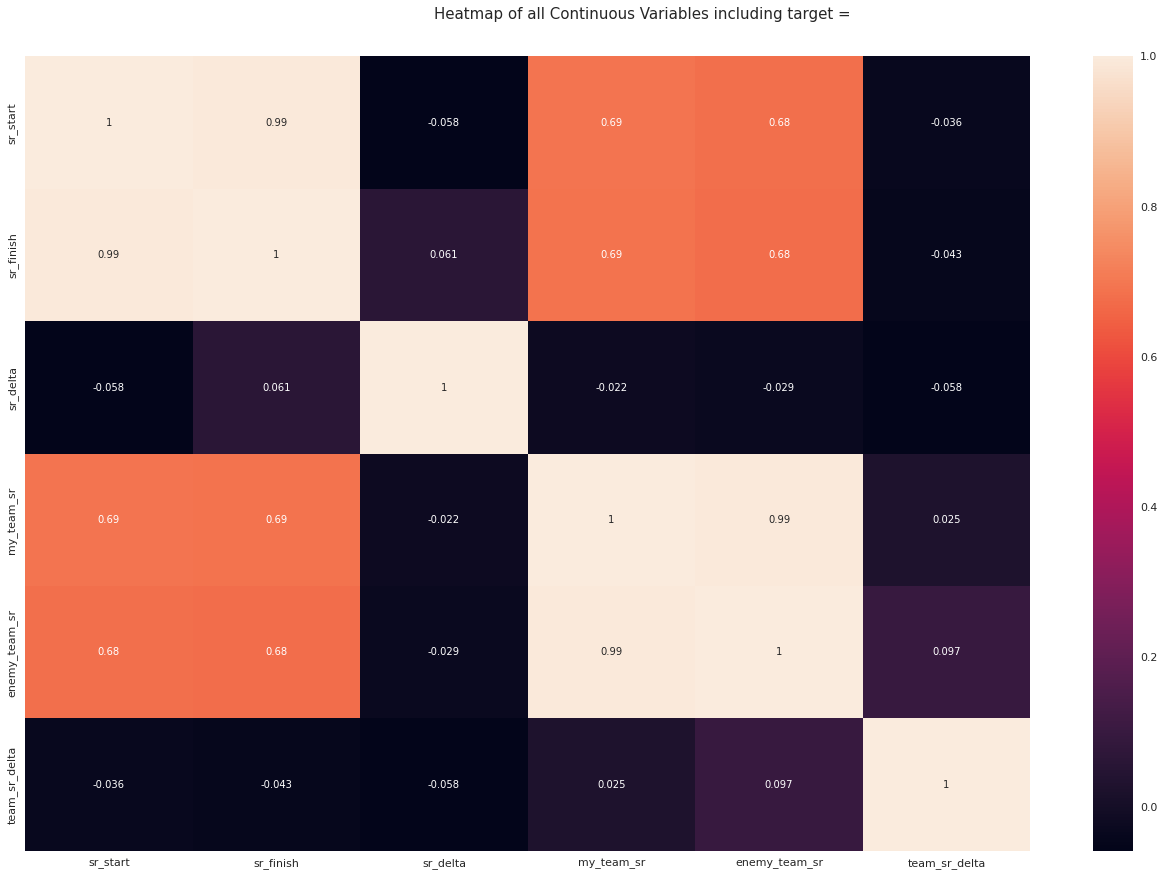

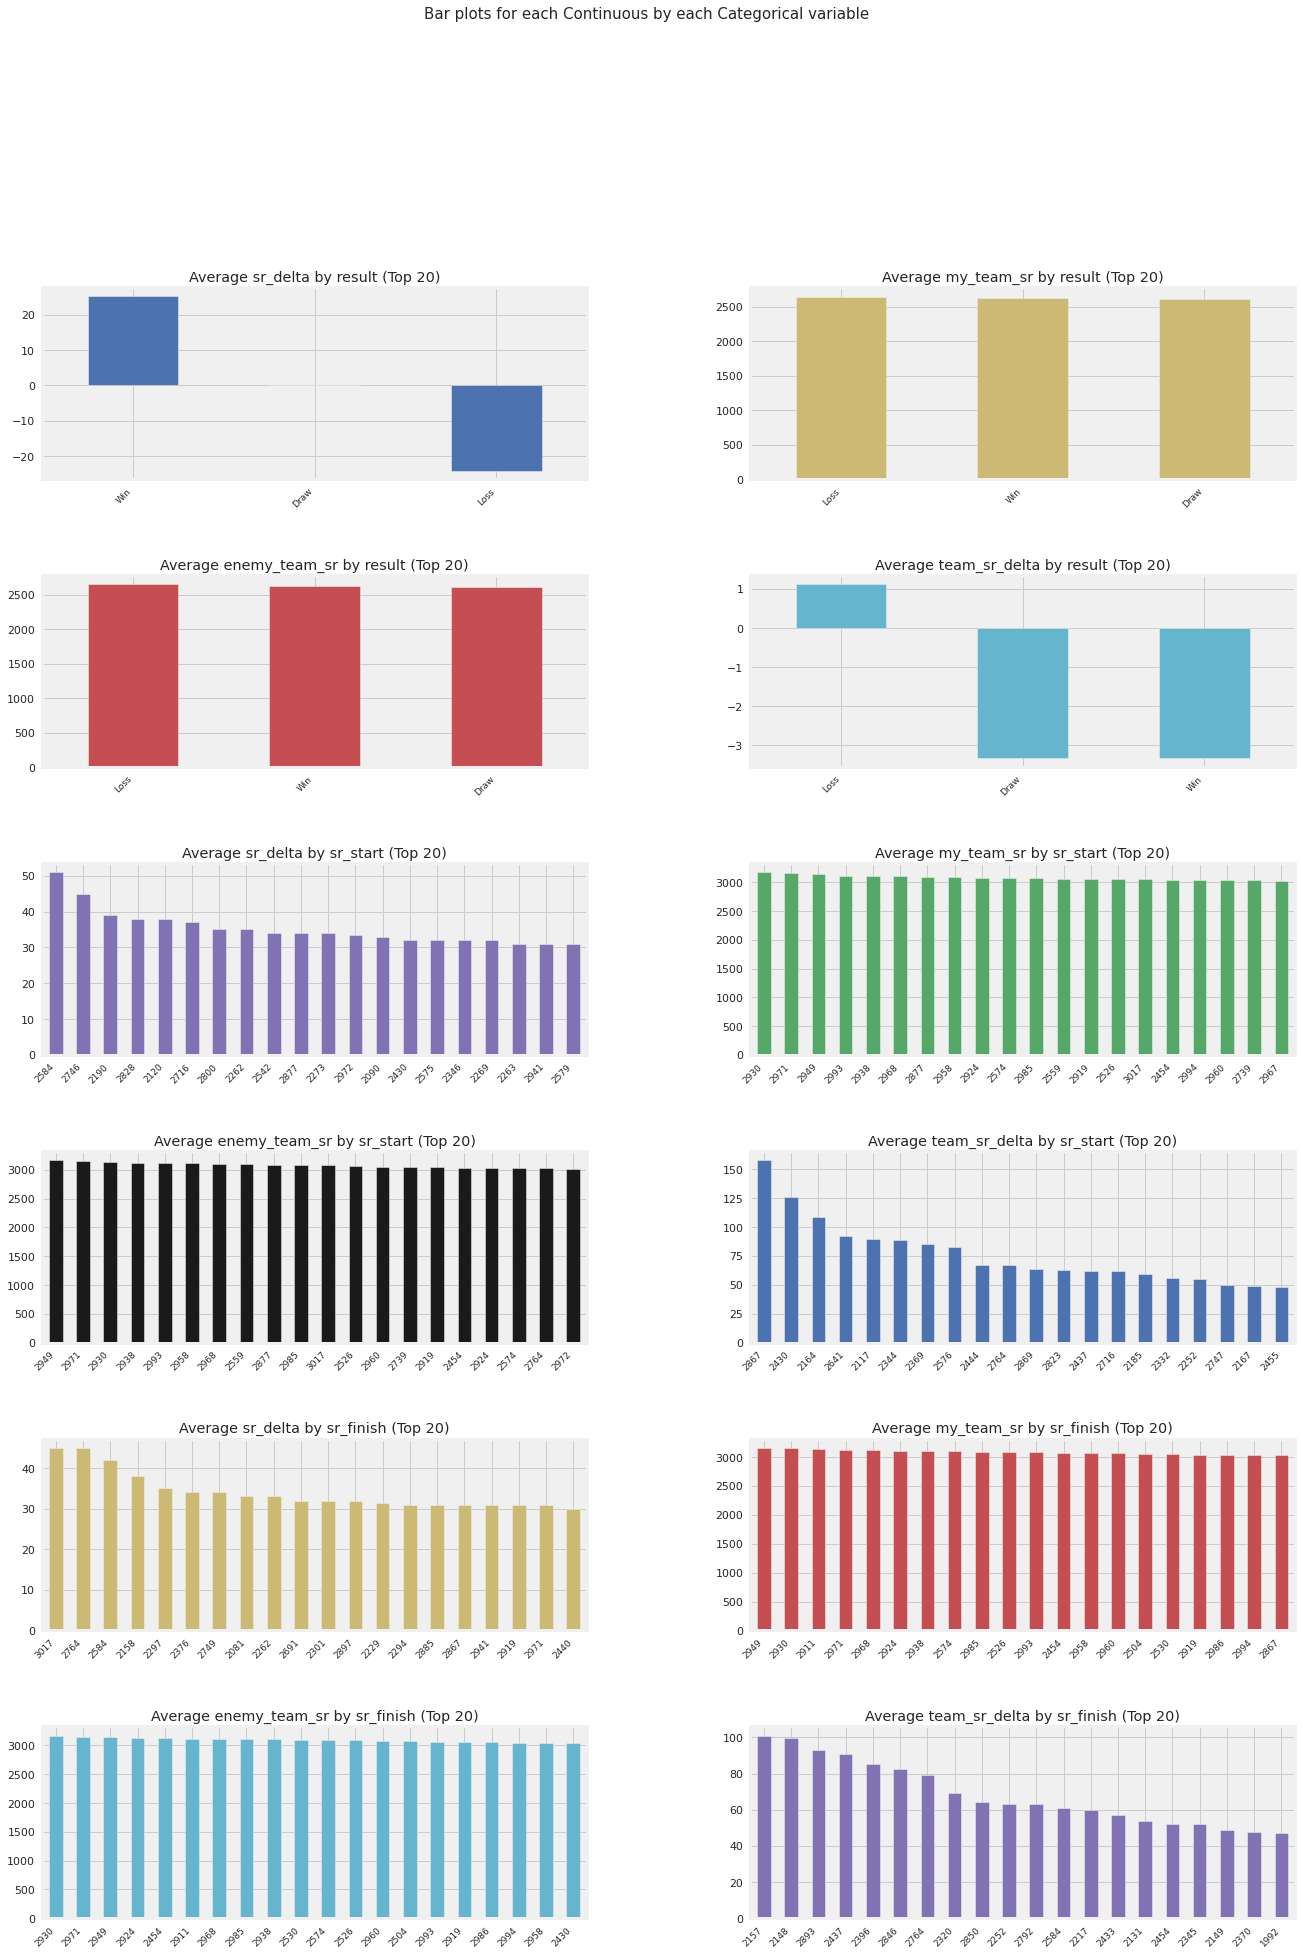

Could not draw wordcloud plot for date
Time to run AutoViz = 8 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


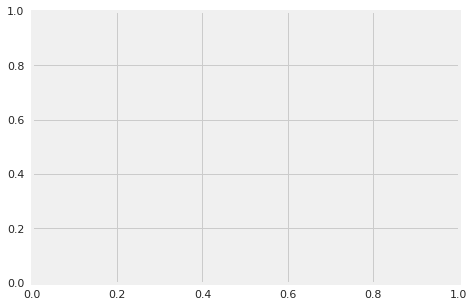

In [48]:
from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()
df = AV.AutoViz('overwatch_clean.csv')

In [49]:
## Number of games
len(overwatch_complete)

1471

In [50]:
## Game outcome percentages
overwatch_complete['result'].value_counts(normalize=True)

Loss    0.477906
Win     0.460911
Draw    0.061183
Name: result, dtype: float64

In [51]:
## Average SR score for my team

overwatch_complete['my_team_sr'].mean().round()

2639.0

In [52]:
## Average SR score for enemy team
overwatch_complete['enemy_team_sr'].mean().round()

2637.0